### Introduction
This dataset is a small-scale survey data investigating grocery purchasing behaviour and habits of Croatians. In attaching is the survey questionnaire describing all key information on how data had been gathered and each interview conducted. The task at hand is to cluster the respondents in relatively homogenous groups. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Firstly the file was transformed to .csv with R
#read DataFrame

data = pd.read_csv('data3_1.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)

# Delete columns with equal values because they don't show differences bitween objects
for i in data.columns:
    if len(data[i].unique()) == 1:
        del data[i]

#Delete columns with id        
del data['respid']

#Fill fields with Nan
data.fillna(0, inplace = True)

#Select only numerical columns
data = data.select_dtypes(include=[np.number])

#Show it
data.head()

,q2,q5,q6_1,q6_2,q6_3,q6_4,q9_1,q9_2,q9_3,q9_4,...,q20_1n,q20_2n,q20_3n,q20_4n,q20_5n,q20_6n,q20_7n,q20_count,QCL_1,QCL_2
0,33,1500,80,0.0,20.0,0.0,7.0,8.0,1.0,0.0,...,0,0,1,0,0,0,1,2,0.0,2
1,27,3000,60,30.0,5.0,5.0,0.0,0.0,2.0,0.0,...,0,0,1,0,0,1,1,3,0.0,2
2,32,1500,80,10.0,10.0,0.0,5.0,2.0,1.0,8.0,...,0,1,1,0,0,1,0,3,0.0,2
3,46,1500,65,5.0,25.0,5.0,6.0,2.0,4.0,8.0,...,0,1,1,0,0,1,1,4,0.0,3
4,47,2000,95,2.0,3.0,0.0,5.0,12.0,6.0,0.0,...,0,0,1,0,0,0,0,1,0.0,3


Number of clusters 2 - The average Silhouette score= 0.6129675261
Number of clusters 3 - The average Silhouette score= 0.620540150995
Number of clusters 4 - The average Silhouette score= 0.565085251077
Number of clusters 5 - The average Silhouette score= 0.593815675492
Number of clusters 6 - The average Silhouette score= 0.610254468664
Number of clusters 7 - The average Silhouette score= 0.616029139445
Number of clusters 8 - The average Silhouette score= 0.615804834998
Number of clusters 9 - The average Silhouette score= 0.616269069063
Number of clusters 10 - The average Silhouette score= 0.6460682069


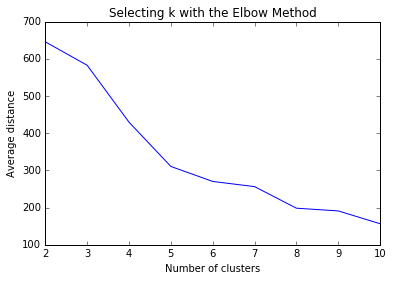

In [4]:
from scipy.spatial.distance import cdist
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Try to learn with Kmeans-model

#Range for number of clasters
clusters=range(2,11)
meandist=[]

for k in clusters:
    
    #Fit KMeans
    model=KMeans(n_clusters=k)
    model.fit(data)
    
    #Calculate mean distances between clusters for Elbow method
    meandist.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
    
    cluster_labels = model.predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print('Number of clusters', k, '- The average Silhouette score=', silhouette_avg)
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

After fitting KMeans model we can see that Silhouette score has a sufficiently large value. But if we look at the data, we see that the values in different columns have a different scale. For example 'q5', 'q2' etc. That's why 'q5' is the most important for the model. Show it.

In [5]:
#Delete 'q5' column
del data['q5']

#And try to fit again
clusters=range(2,11)
meandist=[]

for k in clusters:
    #Fit KMeans
    model=KMeans(n_clusters=k)
    model.fit(data)
    
    cluster_labels = model.predict(data)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print('Number of clusters', k, '- The average Silhouette score=', silhouette_avg)



Number of clusters 2 - The average Silhouette score= 0.138969536991
Number of clusters 3 - The average Silhouette score= 0.161547684756
Number of clusters 4 - The average Silhouette score= 0.169006493262
Number of clusters 5 - The average Silhouette score= 0.18084870053
Number of clusters 6 - The average Silhouette score= 0.193395414488
Number of clusters 7 - The average Silhouette score= 0.2103076484
Number of clusters 8 - The average Silhouette score= 0.188197977607
Number of clusters 9 - The average Silhouette score= 0.176148656614
Number of clusters 10 - The average Silhouette score= 0.173219260364


#### So, we can see that Silhouette score is very small (less 0.5). It says that data can not be clustered. And in the previous model the clustering was built on the values from the column 'q5' (Spending per month)

### Try to improve our model

In [6]:
pd.set_option('display.max_columns', 640)
data = pd.read_csv('task3_1.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)


# Delete columns with equal values because they don't show differences bitween lines
for i in data.columns:
    if len(data[i].unique()) == 1:
        del data[i]



# Delete columns without discription
data.drop(data.iloc[:, 554:].columns, axis = 1, inplace = True)

#Delete colimn with Id and 'hage'. Because they are not informative
del data['respid']
del data['hage']

#Also delete rows with 10 max and min values in column 'q5'. 
#This is necessary in order to avoid anomalies.
data.drop(data.sort_values('q5')[:10].index, axis = 0, inplace = True)
data.drop(data.sort_values('q5')[-10:].index, axis = 0, inplace = True)

In [7]:
#Select:
#columns with numbers
numeric_columns = ['q2', 'q5', 'q6_1', 'q6_2', 'q6_3', 'q6_4', 'q11_1', 'q11_2', 'q11_3', 'q11_4', 'q11_5', 
                   'q11_6', 'q11_7', 'q11_8', 'q11_9', 'q11_10', 'q11_11', 'q11_12', 'q11_13']

#Rating columns
rating_columns = ['q9_1', 'q9_2', 'q9_3', 'q9_4', 'q9_5', 'q9_6', 'q9_7', 'q9_8', 'q9_9', 'q9_10', 'q9_11', 
                  'q9_12', 'q9_13', 'q9_13', 'q9_14', 'q9_15', 'q9_16', 'q9_17']

#and columns with answers "other"
other_columns = ['q7_10_other', 'q10_13_other', 'q12_18_other', 'q14_9_other', 
                 'q16_7_other', 'q17_5_other', 'q18_5_other', 'q19_21_other', 'q24_8_other']

#Delete columns with answers "other" because of difficulties with explanation

data.drop(other_columns, axis = 1, inplace = True)

#Fill fields with Nan in numeric columns with mean value of each column
for i in numeric_columns:
    data[i].fillna(data[i].mean(), inplace = True)
    
#Fill fields with Nan in rating columns with the most frequent value of each column
for n in rating_columns:
    data[n].fillna(data[n].value_counts().keys()[0], inplace = True)
    
#Fill value in another columns with '0'
data.fillna('0', inplace = True)

In [8]:
#Apply One-Hot-Encoding for categorical features
data = pd.get_dummies(data)

#And show the number of features
data.shape[1]

1196

In [10]:
#Previously we found that the different features have a different scale. For scaling, we apply the method normalize
#Scaling is very important for KMeans

from sklearn.preprocessing import normalize

data = normalize(data)

In [11]:
#Now DataFrame has 1196 features. It's a lot.
#Try to decrease it with PCA method

from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
data = pca.fit_transform(data)

Number of clusters 2 - The average Silhouette score= 0.574571900584
Number of clusters 3 - The average Silhouette score= 0.493706019379
Number of clusters 4 - The average Silhouette score= 0.321520144494
Number of clusters 5 - The average Silhouette score= 0.327841827028
Number of clusters 6 - The average Silhouette score= 0.327548799083
Number of clusters 7 - The average Silhouette score= 0.301413670361
Number of clusters 8 - The average Silhouette score= 0.314878994702
Number of clusters 9 - The average Silhouette score= 0.305069783508
Number of clusters 10 - The average Silhouette score= 0.303063539229


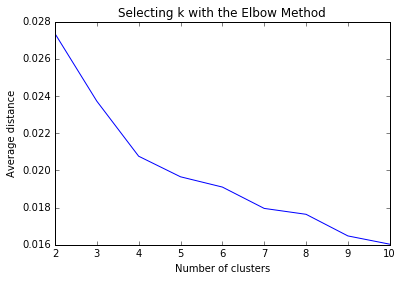

In [12]:
#Try to learn with Kmeans-model

#Range for number of clasters
clusters=range(2,11)
meandist=[]

for k in clusters:
    #Fit kmeans
    model=KMeans(n_clusters=k)
    model.fit(data)
    
    #Calculate mean distances between clusters for Elbow method
    meandist.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
    
    cluster_labels = model.predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print('Number of clusters', k, '- The average Silhouette score=', silhouette_avg)
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

### So, we can see that Silhouette score is rather well for clustering in comparison with the first model

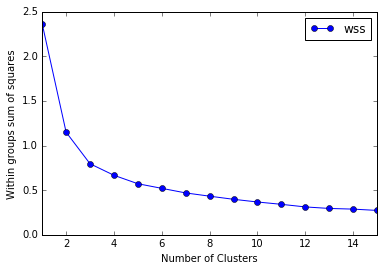

In [13]:
#Try to understand the optimal number of clusters for our model.
#Silhouette score is well for 2 or 3 clusters
#Calculate Kmeans inertia (Sum of distances of samples to their closest cluster center)
results = []
for n_clusters in range(1, 16):
    model = KMeans(n_clusters=n_clusters)
    model.fit(data)
    results.append({'n_clusters': n_clusters,
                    'wss': model.inertia_})
pd.DataFrame(results).set_index('n_clusters').plot(marker='o')
plt.ylabel('Within groups sum of squares')
plt.xlabel('Number of Clusters')

### The graph shows that at first this coefficient decreases sharply (to 3), and afterwards it continues to decrease slightly. So we can say that optimal number of clusaters is 3

For n_clusters = 2 The average silhouette_score is : 0.575121940107


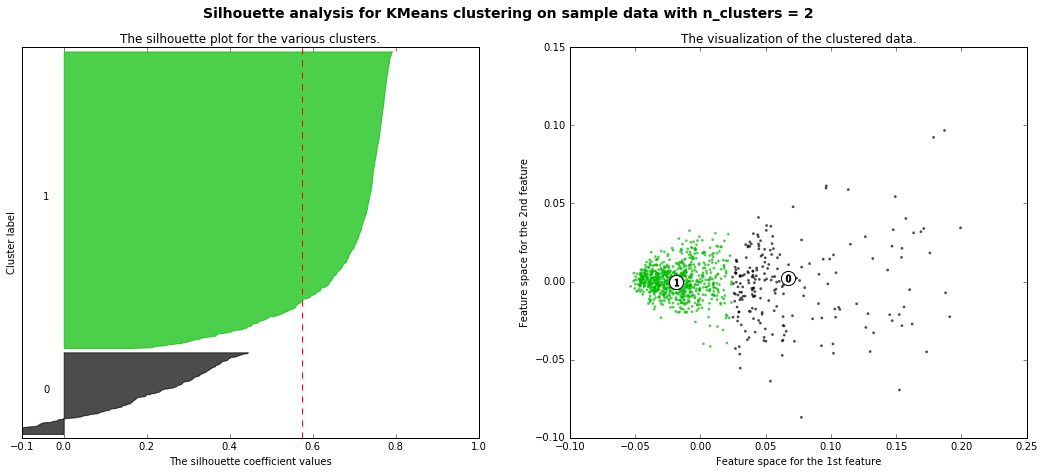

For n_clusters = 3 The average silhouette_score is : 0.493706019379


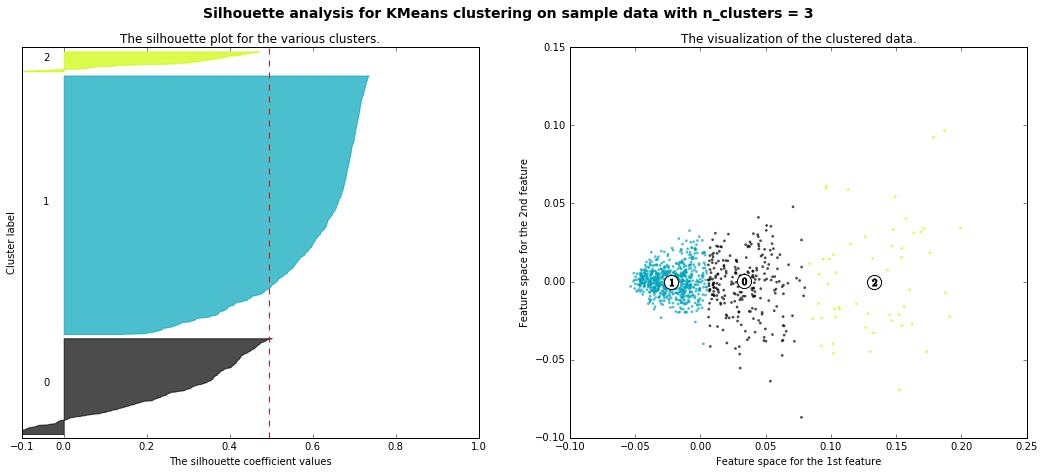

For n_clusters = 4 The average silhouette_score is : 0.321520144494


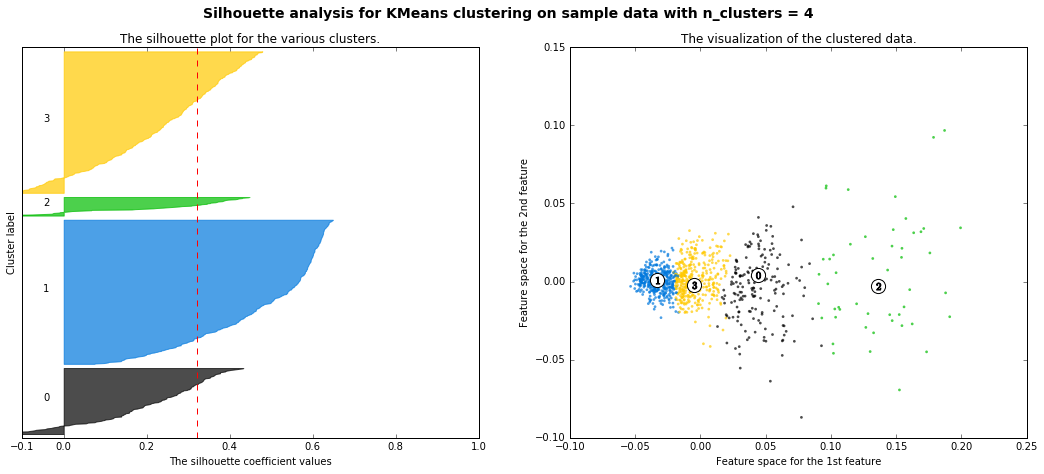

For n_clusters = 5 The average silhouette_score is : 0.324972343017


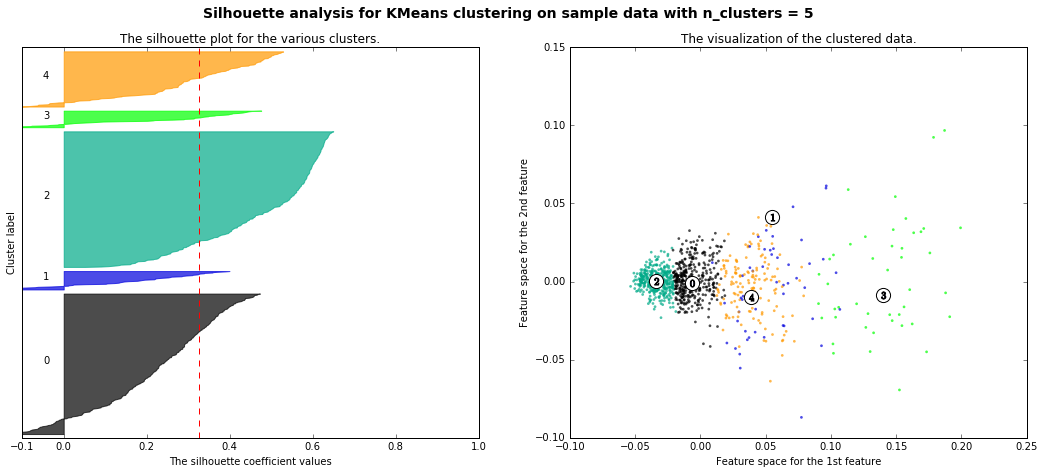

For n_clusters = 6 The average silhouette_score is : 0.324604133984


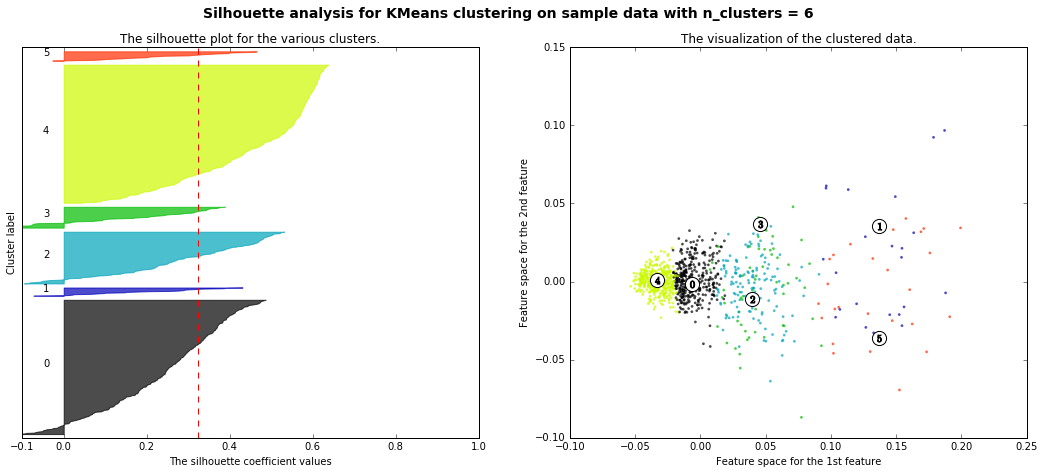

For n_clusters = 7 The average silhouette_score is : 0.305999353544


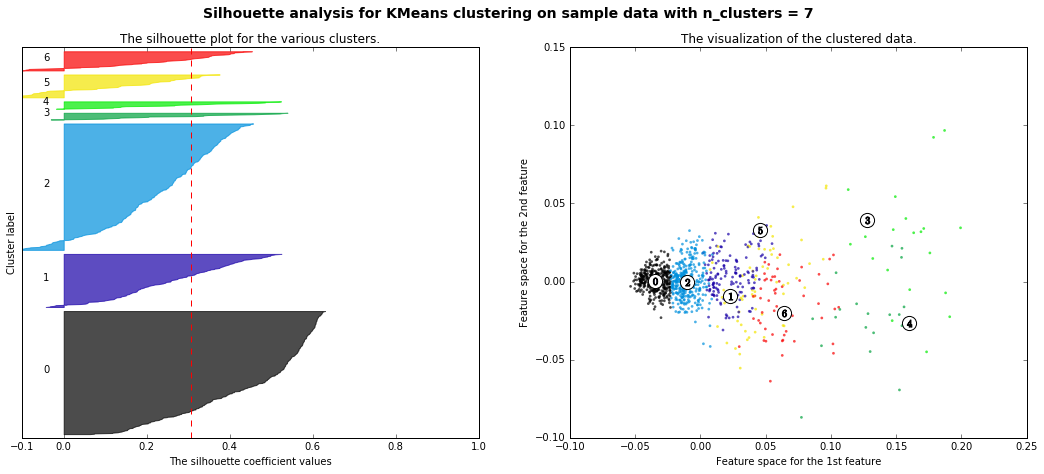

For n_clusters = 8 The average silhouette_score is : 0.307757812866


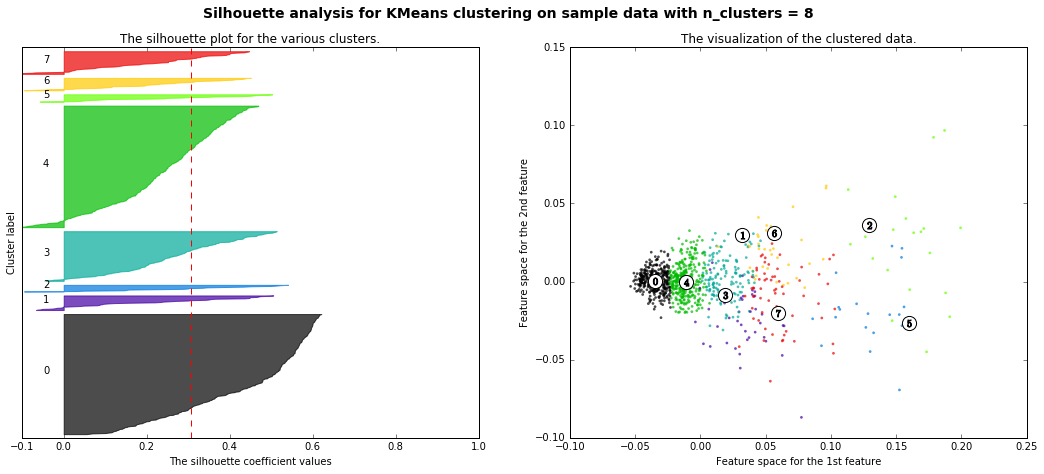

For n_clusters = 9 The average silhouette_score is : 0.304245065115


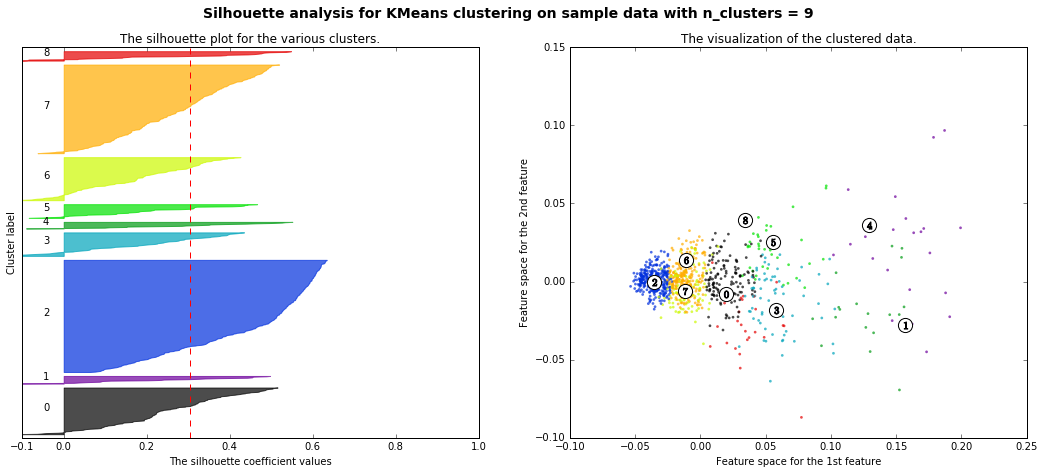

In [19]:
#Construct the dependences of the silhouette coefficient on the number of clusters. 
#Look at the number of objects in each class. And try to visualize

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from [-1, 1]
   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

       # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data[:, 0], data[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

## SUMMARY:

### As can be seen from the last visualization, the most optimal partition is observed with 3 clusters, as we previously assumed